# 🧭 Data Exploration (Exploration des Données)

## 🎯 Objectifs de cette section

- **Visualiser** la distribution des classes (équilibrées ou non)
- **Inspecter** les images (dimensions, couleurs, format)
- **Vérifier** la présence de doublons ou de données corrompues
- **Analyser** les métadonnées si disponibles (ex : noms de fichiers, labels, etc.)
- **Préparer** les jeux de données pour les étapes suivantes (train/test/validation)

# Importation des librairies

In [4]:
# Importation des bibliothèques

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, UnidentifiedImageError

# Pour afficher les images inline dans Jupyter
#%matplotlib inline

# Définitions des chemins

In [5]:
base_dir = "chest_Xray"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# 📊 Répartition des Classes

Dans cette section, nous utilisons la fonction `count_images` afin de compter le nombre d’images présentes dans chaque sous-ensemble du jeu de données (train, validation, test) et de vérifier que les classes sont équilibrées.

L’objectif est de s’assurer que les images sont bien réparties entre les deux classes : **NORMAL** et **PNEUMONIA**. Une bonne répartition est essentielle pour éviter les biais lors de l'entraînement du modèle.

## 📁 Répartition finale :

- **Entraînement (Train)** : 4900 images  
  - NORMAL : 2450  
  - PNEUMONIA : 2450  

- **Validation (Val)** : 1050 images  
  - NORMAL : 525  
  - PNEUMONIA : 525  

- **Test** : 1050 images  
  - NORMAL : 525  
  - PNEUMONIA : 525  

✅ *Les données sont parfaitement équilibrées dans chaque ensemble, ce qui est idéal pour entraîner le modèle et évaluer ses performances de manière fiable.*

In [6]:
# Distribution des classes

def count_images(directory):
    """
    Renvoie le nombre d'images par catégories dans chaque datasets
    """
    normal = len(os.listdir(os.path.join(directory, "NORMAL")))
    pneumonia = len(os.listdir(os.path.join(directory, "PNEUMONIA")))

    return normal, pneumonia

train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

print(f"Train: {train_counts}")
print(f"Val: {val_counts}")
print(f"Test: {test_counts}")

Train: (2450, 2450)
Val: (525, 525)
Test: (525, 525)


# 📊 Visualisation de la Répartition des Classes

Pour compléter la vérification de l’équilibre entre les classes, nous affichons ici un graphique représentant le nombre d’images par classe (**NORMAL** et **PNEUMONIA**) dans chacun des jeux de données : **entraînement**, **validation** et **test**.

Ces barplots permettent de visualiser rapidement la répartition des données et de confirmer qu’il n’y a pas de déséquilibre entre les deux classes dans chaque ensemble.

Chaque sous-graphe correspond à un sous-ensemble :
- **Train Set**
- **Validation Set**
- **Test Set**

✅ *Une répartition équilibrée est essentielle pour garantir que le modèle ne favorise pas une classe au détriment de l’autre.*

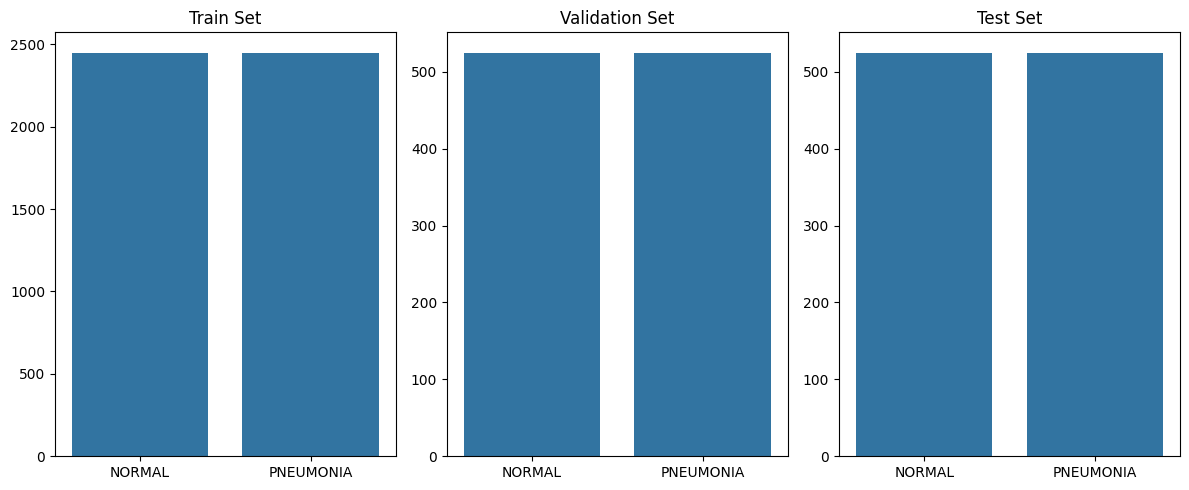

In [7]:
# Visualisation

labels = ["NORMAL", "PNEUMONIA"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=labels, y=train_counts)
plt.title("Train Set")

plt.subplot(1, 3, 2)
sns.barplot(x=labels, y=val_counts)
plt.title("Validation Set")

plt.subplot(1, 3, 3)
sns.barplot(x=labels, y=test_counts)
plt.title("Test Set")

plt.tight_layout()
plt.show()

# 🖼️ Visualisation d'Images Aléatoires

Afin de mieux comprendre la nature des données avec lesquelles nous allons entraîner notre modèle, cette section affiche quelques **images aléatoires** provenant de chaque classe du jeu d'entraînement.

La fonction `show_random_images()` :
- Sélectionne aléatoirement *n* images depuis le dossier spécifié (par classe).
- Vérifie que chaque fichier est bien une image grâce à son extension.
- Affiche les images en niveaux de gris avec leurs étiquettes respectives.

Nous affichons ici :
- Quelques images de la classe **NORMAL**
- Quelques images de la classe **PNEUMONIA**

Cette étape permet de se familiariser avec le type de radiographies utilisées, et de repérer visuellement certaines différences caractéristiques entre les deux classes.

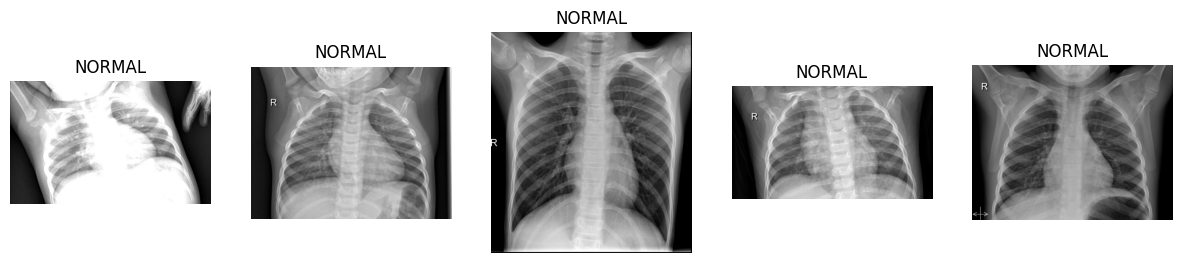

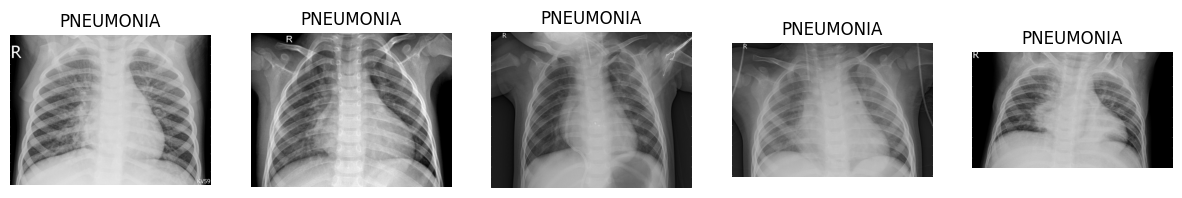

In [8]:
# Afficher des images aléatoirement

def show_random_images(directory, label, n=5):
    path = os.path.join(directory, label)

    # Filtrer les fichiers avec extensions d'images
    valid_extensions = [".jpg", ".jpeg", ".png", ".bmp"]
    all_files = os.listdir(path)
    image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in valid_extensions]

    # Choisir aléatoirement jusqu'à n images
    selected_images = random.sample(image_files, min(n, len(image_files)))

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(path, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(1, n, i + 1)
            plt.imshow(img.convert("L"), cmap="gray")
            plt.title(label)
            plt.axis("off")
        except UnidentifiedImageError:
            print(f"Image non valide ignorée : {img_path}")
    
    plt.show()

show_random_images(train_dir, "NORMAL")
show_random_images(train_dir, "PNEUMONIA")

# 📏 Distribution des Dimensions des Images

Avant de passer au prétraitement, il est essentiel d'étudier les **tailles des images** présentes dans notre dataset. Les modèles de deep learning nécessitent en général que toutes les images aient les mêmes dimensions, donc cette analyse nous permet d'anticiper les étapes de redimensionnement.

🔍 Le code ci-dessous :
- Parcourt les jeux **train**, **validation** et **test** dans les deux classes (**NORMAL** et **PNEUMONIA**).
- Récupère la **largeur** et la **hauteur** de chaque image (en pixels).
- Affiche des statistiques utiles : min, max, moyenne, médiane.
- Représente graphiquement la distribution des tailles avec des histogrammes.

📊 Cela nous donne une idée claire de la variabilité des dimensions, et nous aide à choisir une taille d’image cohérente pour l'entraînement.

Largeur - min: 384  max: 2916  moyenne: 1442.592  médiane: 1432.0
Hauteur - min: 127  max: 2713  moyenne: 1100.4292857142857  médiane: 1067.0


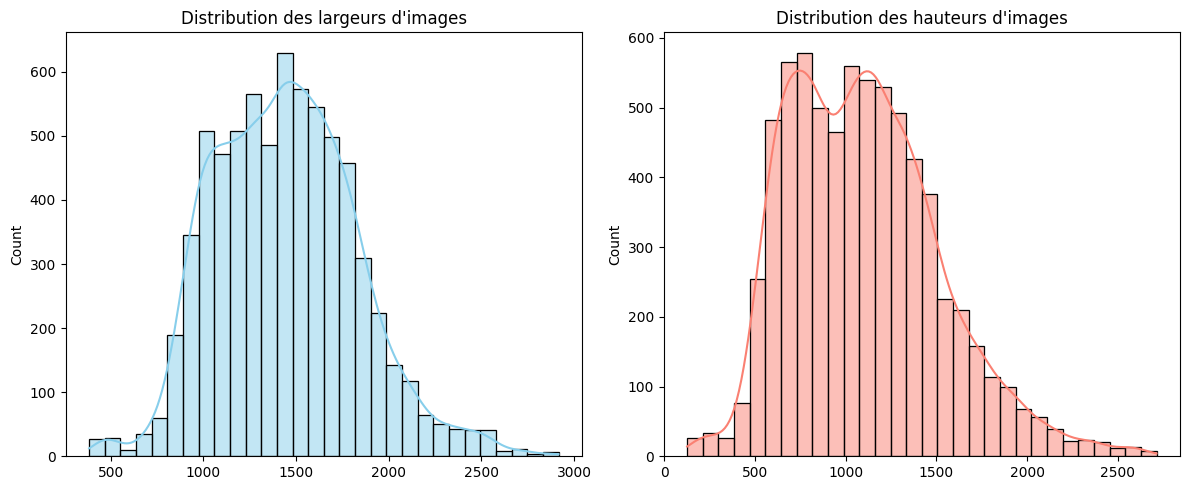

In [9]:
# Distribution de la taille des images

widths = []
heights = []

# On parcourt train, val, test et leurs sous-dossiers
for split in ['train', 'val', 'test']:
    split_path = os.path.join(base_dir, split)
    for label in ['PNEUMONIA', 'NORMAL']:
        label_path = os.path.join(split_path, label)
        for file in os.listdir(label_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                path = os.path.join(label_path, file)
                try:
                    with Image.open(path) as img:
                        w, h = img.size
                        widths.append(w)
                        heights.append(h)
                except Exception as e:
                    print(f"❌ Erreur avec l'image {path}: {e}")

# Statistiques
print("Largeur - min:", np.min(widths), " max:", np.max(widths), " moyenne:", np.mean(widths), " médiane:", np.median(widths))
print("Hauteur - min:", np.min(heights), " max:", np.max(heights), " moyenne:", np.mean(heights), " médiane:", np.median(heights))

# Graphiques
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, kde=True, bins=30, color='skyblue')
plt.title("Distribution des largeurs d'images")

plt.subplot(1, 2, 2)
sns.histplot(heights, kde=True, bins=30, color='salmon')
plt.title("Distribution des hauteurs d'images")

plt.tight_layout()
plt.show()